In [82]:
import numpy as np
import sys
import tqdm

import matplotlib.pyplot as plt

In [3]:
sys.path.append("../utils/")

In [4]:
import hamiltonian_utils as hamu
import hierarcical_utils as hu
import plot_utils as pu

In [5]:
with open("../../data/CRISPR_db_2109.txt") as f:
    lines = [x[:-2] for x in f.readlines()]

In [24]:
arrays_str = [[x for x in y.split("\t")[1:] if len(x) > 0 and len(x) < 40] for y in lines]

In [25]:
all_spacers = set()
for arr in arrays_str:
    for sp in arr:
        all_spacers.add(sp)

In [26]:
len(all_spacers)

1749

In [27]:
sorted(list(all_spacers))

['AAAAAATGATGCTGTATTTCACTATTGGGTT',
 'AAAAAATGATGCTGTATTTCACTATTGGGTTC',
 'AAAAAATGCGCAACTACCAGTAAATGGCCTGA',
 'AAAAACATCGGTATTCTCCTCGTTTATTAAGC',
 'AAAAACCAAACTTCTCCATAAATTCCATAGCCG',
 'AAAAATTCATATTTGATAAACACCCGCGGTTTGTAT',
 'AAAACCAAACTTCTCCATAAATTCCATAGCCG',
 'AAAACCACCGGACCTGACCATTTGAAATGAGC',
 'AAAACCCAGCTTGTACTGAAAATGATAGACGT',
 'AAAACCCAGCTTGTACTGAAAATGATAGATGT',
 'AAAACCGATATTTACCAGGTTGTTACTGATAG',
 'AAAATTCATATTGATAAACACCGCGTTTGTAT',
 'AAAATTTGTTGCAAAACTCGCTGTAAAAATAG',
 'AAACAGATTATTCGTTTTCCCCATATTCATGA',
 'AAACAGATTGTTCGTTTTCCCCATATTCATGA',
 'AAACCGAAACACACGATCAATCCGAATATGAG',
 'AAACGGGACCAGTGCTGCGATAGCCTGGAGGG',
 'AAAGACAAATTTCTTTGTTCCTATGGCCAGAC',
 'AAAGCACGGAATTTTTACAGCGCGTTAGATCC',
 'AAAGGCAATACGGCGGGCATTCAGTTGCCAGC',
 'AAAGTGACGCGATAGACGCGCTGATTGACGCT',
 'AAATAATGTTCACGCCGCGTTAATGCAAATCC',
 'AAATATGGGAAGCGCCGTTAATGAAATCAAAA',
 'AAATATGGGGAGCGCCGTTAATGAAAATCAAAA',
 'AAATATGGGGAGCGCCGTTAATGAAATCAAAA',
 'AAATATGGGGAGCGCCGTTAATGAAATCAAAN',
 'AAATATGGGGAGCGGCGGTAATGAAATTCAA

In [44]:
od, sp_to_n, cl_to_n, n_to_cl = hu.squash(dict(zip(list(all_spacers), np.ones(1760))), 2)

A Jupyter Widget

In [54]:
arrays_n = [[cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in y] for y in tqdm.tqdm_notebook(arrays_str)]

A Jupyter Widget

In [57]:
arrays_n = np.array(arrays_n)

In [59]:
N = len(arrays_n)

In [61]:
arrays_n[np.random.randint(0, N, 4)]

array([list([395, 316, 485, 295]), list([112, 966, 807, 1290, 1178, 973]),
       list([999, 271, 1106, 1162, 1522, 192, 1108, 1026, 1553]),
       list([1018, 419, 806, 1029, 1194])], dtype=object)

In [63]:
def get_stats(arrays):
    sp_counts = {}
    for arr in arrays:
        for sp in arr:
            if sp in sp_counts.keys():
                sp_counts[sp] += 1
            else:
                sp_counts[sp] = 1
    return sp_counts

In [80]:
maxes = []
for i in range(1000):
    test_arr = arrays_n[np.random.randint(0, N, 4)]
    st = get_stats(test_arr)
    m = max(st.values())
    maxes.append(m)

(array([445.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 480.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  66.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
        3.6, 3.7, 3.8, 3.9, 4. ]),
 <a list of 30 Patch objects>)

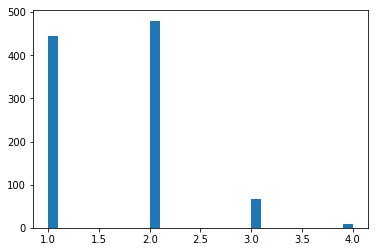

In [83]:
plt.hist(maxes, bins = 30)